# Exploring Cornwall, ON Weather

## Initial work

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import numpy as np
import datetime

In this small exploration I wanted to see what were the lowest temperatures in Cornwall, Ontario when I lived there from 2011 to 2016 and practice with pandas, numpy, and matplotlib. The data was downloaded from https://cornwall.weatherstats.ca/download.html, which state: "The historical weather data, forecast and current conditions graphics are courtesy of Environment and Climate Change Canada (http://weather.gc.ca/). The information presented is combined from multiple Environment and Climate Change Canada data sources and all effort is made to be accurate."

In [2]:
data = pd.read_csv('data\weatherstats_cornwall_hourly.csv', low_memory=False)
data

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,...,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation,max_air_temp_pst1hr,min_air_temp_pst1hr
0,2023-12-19 09:00:00 EST,1702994400,100.30,100.92,W,26.0,16.0,NaN,90.0,-3.2,...,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.5,-1.8
1,2023-12-19 08:00:00 EST,1702990800,100.09,100.71,W,27.0,16.0,NaN,97.0,-1.9,...,-6.0,NaN,NaN,1.8,NaN,NaN,NaN,NaN,-0.5,-1.5
2,2023-12-19 07:00:00 EST,1702987200,99.91,100.52,W,28.0,16.0,NaN,96.0,-1.0,...,-5.0,NaN,NaN,1.6,NaN,NaN,NaN,NaN,0.5,-0.5
3,2023-12-19 06:00:00 EST,1702983600,99.68,100.29,WNW,30.0,8.0,NaN,96.0,-0.1,...,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,1.5,0.5
4,2023-12-19 05:00:00 EST,1702980000,99.50,100.11,W,28.0,12.0,NaN,94.0,0.6,...,NaN,NaN,NaN,1.4,NaN,NaN,NaN,NaN,2.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2006-11-08 14:00:00 EST,1163012400,99.99,100.58,NaN,6.0,9.0,NaN,97.0,9.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149996,2006-11-08 13:00:00 EST,1163008800,100.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149997,2006-11-08 12:00:00 EST,1163005200,100.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149998,2006-11-08 11:00:00 EST,1163001600,100.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data processing

Using only data from when I lived in Cornwall and removing NaNs (ended up removing 2011 and most of 2012 due to those years not having complete data)

In [3]:
data_df = data[data.date_time_local.between('2011-09-01', '2016-03-16')]
data_df = data_df.dropna(subset='min_air_temp_pst1hr')
data_df

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,...,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation,max_air_temp_pst1hr,min_air_temp_pst1hr
68027,2016-03-15 23:00:00 EDT,1458097200,100.64,101.24,ENE,6.0,5.0,NaN,98.0,3.2,...,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,3.7,3.5
68028,2016-03-15 22:00:00 EDT,1458093600,100.66,101.26,NNE,3.0,6.0,NaN,97.0,3.2,...,NaN,NaN,NaN,2.6,NaN,NaN,NaN,NaN,3.8,3.6
68029,2016-03-15 21:00:00 EDT,1458090000,100.62,101.22,NNW,34.0,5.0,NaN,95.0,3.1,...,NaN,NaN,NaN,2.6,NaN,NaN,NaN,NaN,4.2,3.8
68030,2016-03-15 20:00:00 EDT,1458086400,100.57,101.17,NW,30.0,4.0,NaN,95.0,3.5,...,NaN,NaN,NaN,2.6,NaN,NaN,NaN,NaN,4.7,4.2
68031,2016-03-15 19:00:00 EDT,1458082800,100.49,101.09,ENE,7.0,10.0,NaN,89.0,3.0,...,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,6.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97833,2012-10-21 01:00:00 EDT,1350795600,99.91,100.49,SSW,20.0,7.0,NaN,90.0,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,7.3
97834,2012-10-21 00:00:00 EDT,1350792000,99.91,100.49,SSW,20.0,4.0,NaN,90.0,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.6,7.2
97836,2012-10-20 22:00:00 EDT,1350784800,99.92,100.50,SW,22.0,9.0,NaN,76.0,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,9.6
97837,2012-10-20 21:00:00 EDT,1350781200,99.94,100.52,WSW,23.0,15.0,NaN,72.0,5.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.5,9.3


Extracting date information from original column, creating new ones, and creating a new dataframe for simple viewing

In [4]:
data_df[['date', 'time', 'timezone']] = data_df['date_time_local'].str.split(expand=True)
data_df['date'] = pd.to_datetime(data_df['date'])
data_df['year_month'] = data_df['date'].dt.to_period('M')
data_df = data_df.drop(columns='timezone')
new_data_df = data_df[['date','year_month','time','min_air_temp_pst1hr']]
new_data_df

,date,year_month,time,min_air_temp_pst1hr
68027,2016-03-15,2016-03,23:00:00,3.5
68028,2016-03-15,2016-03,22:00:00,3.6
68029,2016-03-15,2016-03,21:00:00,3.8
68030,2016-03-15,2016-03,20:00:00,4.2
68031,2016-03-15,2016-03,19:00:00,4.6
...,...,...,...,...
97833,2012-10-21,2012-10,01:00:00,7.3
97834,2012-10-21,2012-10,00:00:00,7.2
97836,2012-10-20,2012-10,22:00:00,9.6
97837,2012-10-20,2012-10,21:00:00,9.3


Checking for the lowest temperature in this timeframe

In [5]:
new_data_df[new_data_df.min_air_temp_pst1hr == new_data_df.min_air_temp_pst1hr.min()]

,date,year_month,time,min_air_temp_pst1hr
87700,2013-12-17,2013-12,05:00:00,-34.1


In [6]:
december_2013_df = new_data_df[new_data_df.year_month == '2013-12']

december_2013_df[december_2013_df.min_air_temp_pst1hr == december_2013_df.min_air_temp_pst1hr.min()]

,date,year_month,time,min_air_temp_pst1hr
87700,2013-12-17,2013-12,05:00:00,-34.1


Creating new dataframe with only date, time and minimum temperature

In [7]:
date_temp_df = pd.DataFrame(new_data_df.groupby('date').min().reset_index())

date_temp_df = date_temp_df.rename(columns={'min_air_temp_pst1hr': 'min_temp'})

date_temp_df

,date,year_month,time,min_temp
0,2012-10-20,2012-10,20:00:00,9.2
1,2012-10-21,2012-10,00:00:00,7.2
2,2012-10-22,2012-10,00:00:00,8.7
3,2012-10-23,2012-10,00:00:00,1.5
4,2012-10-24,2012-10,00:00:00,0.9
...,...,...,...,...
1234,2016-03-11,2016-03,00:00:00,0.0
1235,2016-03-12,2016-03,00:00:00,-1.0
1236,2016-03-13,2016-03,00:00:00,1.1
1237,2016-03-14,2016-03,00:00:00,-0.6


When I initially graphed the points above and plotted a line through them, a single line was created, but I wanted each year to have it's own line for easier comparison. So the solution I came up with was to offset the dates of subsequent years to the corresponding day in 2012 (keeping in mind there was a leap year in the data, so I couldn't just subtract 365 days).

In [8]:
# Conditionally subtract 1 year only for rows where the year is equal to the target year
# Define a custom function to subtract a variable number of years based on the year

years_list = pd.unique(date_temp_df['date'].dt.year)

for i, year in enumerate(years_list):
    if year != 2012:
        condition = date_temp_df['date'].dt.year == year
        date_temp_df.loc[condition, 'date_plot'] = date_temp_df.loc[condition, 'date'] - pd.DateOffset(years=(1*i))
    else:
        condition = date_temp_df['date'].dt.year == year
        date_temp_df.loc[condition, 'date_plot'] = date_temp_df.loc[condition, 'date']

date_temp_df

,date,year_month,time,min_temp,date_plot
0,2012-10-20,2012-10,20:00:00,9.2,2012-10-20
1,2012-10-21,2012-10,00:00:00,7.2,2012-10-21
2,2012-10-22,2012-10,00:00:00,8.7,2012-10-22
3,2012-10-23,2012-10,00:00:00,1.5,2012-10-23
4,2012-10-24,2012-10,00:00:00,0.9,2012-10-24
...,...,...,...,...,...
1234,2016-03-11,2016-03,00:00:00,0.0,2012-03-11
1235,2016-03-12,2016-03,00:00:00,-1.0,2012-03-12
1236,2016-03-13,2016-03,00:00:00,1.1,2012-03-13
1237,2016-03-14,2016-03,00:00:00,-0.6,2012-03-14


Creating arrays for use in matplotlib

In [9]:
# Your original datetime64 array
date_array = np.array(date_temp_df['date'], dtype='datetime64[s]')
date_plot_array = np.array(date_temp_df['date_plot'], dtype='datetime64[s]')
temp_array = np.array(date_temp_df['min_temp'])

# Extract years from the datetime64 array
year_array = np.array([np.datetime64(date).astype('datetime64[Y]').astype(int) + 1970 for date in date_array])

# Creating unique year array
years = np.unique(year_array)

## Data plotting

Plotting the data for each year, making sure that they're separate in order to have them displayed one on top of the other

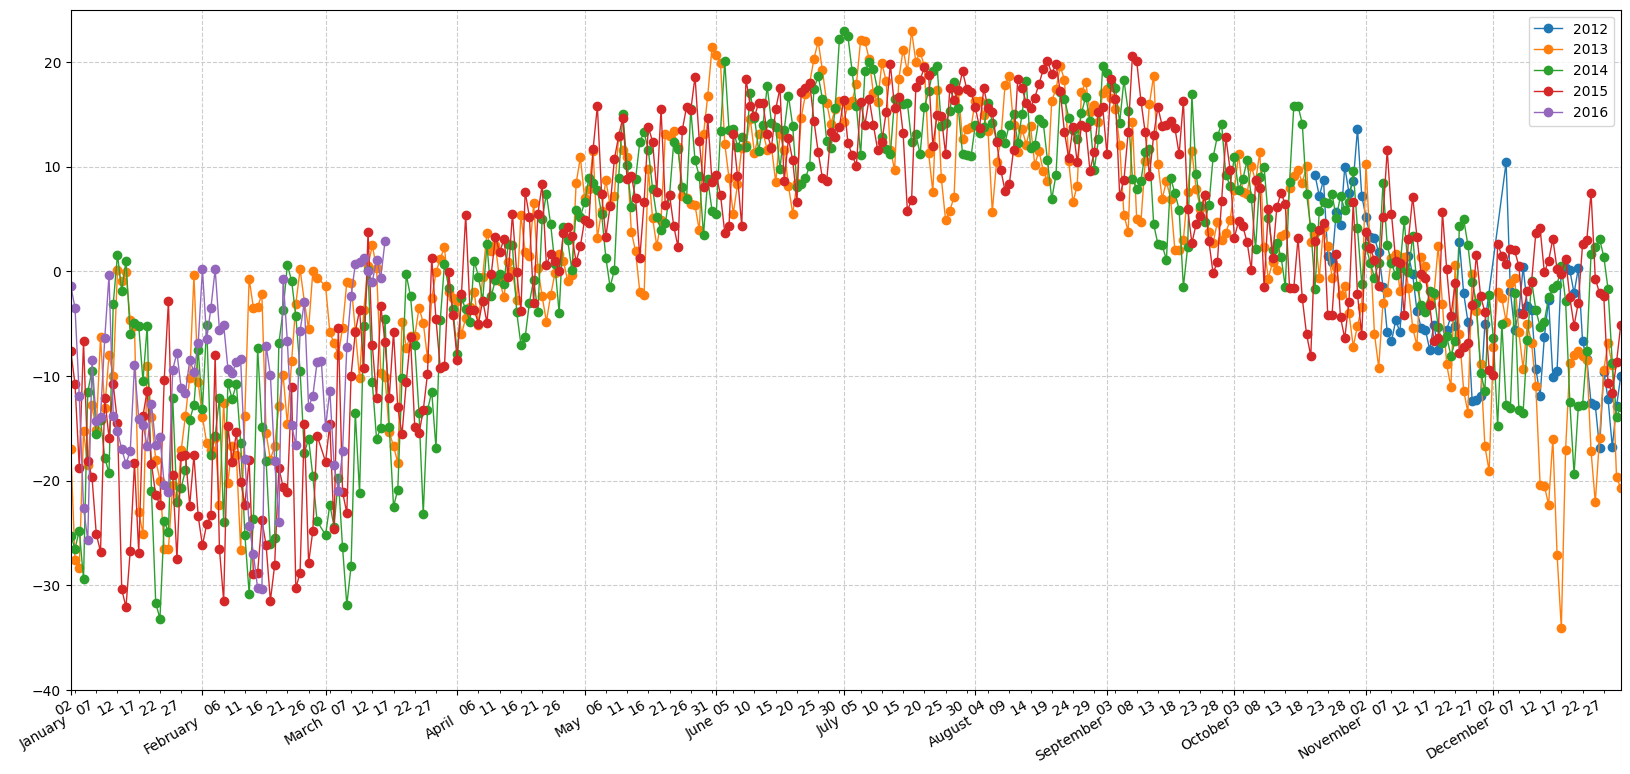

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))

majorfmt = mdates.DateFormatter('\n%B')
minorfmt = mdates.DateFormatter('%d')

ax.set_xlim([datetime.date(2012, 1, 1), datetime.date(2012, 12, 31)])
ax.set_ylim([-40, 25])

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=5))

ax.xaxis.set_major_formatter(majorfmt)
ax.xaxis.set_minor_formatter(minorfmt)

for year in years:

    # Create a boolean array indicating whether each element is from the year specified year
    boolean_array = year_array == year
    
    #Creating x (dates) and y (temperatures) arrays
    x = date_plot_array[boolean_array]
    y = temp_array[boolean_array]

    # x = mdates.date2num(x)

    ax.plot(x, y, linestyle="-", linewidth=1 , marker="o", label=year)
    ax.legend(loc='best')

ax.grid(which='major', color='#CCCCCC', linestyle='--')

fig.autofmt_xdate(which='both')

You can see that the lowest temperature between October 2012 and March 2016 was on December 17, 2013. Just as we saw above when we searched for the minimum value for temperature in the dataframe.

However, I felt this looked too cluttered, so I decided to plot this again but with only the lowest temperature per month instead of per day.

## Obtaining monthly lowest temp

Grouping by the month of the year and finding the minimum temperature of that month.

In [11]:
# Finding the index of the minimum temperature for each month
min_temp_indices = date_temp_df.groupby('year_month')['min_temp'].idxmin()

# Creating a new DataFrame with the rows corresponding to the minimum temperatures
month_temp_df = date_temp_df.loc[min_temp_indices].reset_index(drop=True)

month_temp_df

,date,year_month,time,min_temp,date_plot
0,2012-10-24,2012-10,00:00:00,0.9,2012-10-24
1,2012-11-26,2012-11,00:00:00,-12.4,2012-11-26
2,2012-12-26,2012-12,00:00:00,-16.9,2012-12-26
3,2013-01-03,2013-01,00:00:00,-28.4,2012-01-03
4,2013-02-10,2013-02,00:00:00,-26.6,2012-02-10
5,2013-03-18,2013-03,00:00:00,-18.3,2012-03-18
6,2013-04-02,2013-04,00:00:00,-6.0,2012-04-02
7,2013-05-15,2013-05,00:00:00,-2.3,2012-05-15
8,2013-06-05,2013-06,00:00:00,5.5,2012-06-05
9,2013-07-25,2013-07,00:00:00,4.9,2012-07-25


Double checking I get the same minimum temperature and date 

In [12]:
month_temp_df[month_temp_df.min_temp == month_temp_df.min_temp.min()]

,date,year_month,time,min_temp,date_plot
14,2013-12-17,2013-12,00:00:00,-34.1,2012-12-17


In [13]:
# Your original datetime64 array
date_array = np.array(month_temp_df['date'], dtype='datetime64[s]')
date_plot_array = np.array(month_temp_df['date_plot'], dtype='datetime64[s]')
temp_array = np.array(month_temp_df['min_temp'])

# Extract years from the datetime64 array
year_array = np.array([np.datetime64(date).astype('datetime64[Y]').astype(int) + 1970 for date in date_array])

# Creating unique year array
years = np.unique(year_array)

## Plotting with monthly lowest temp

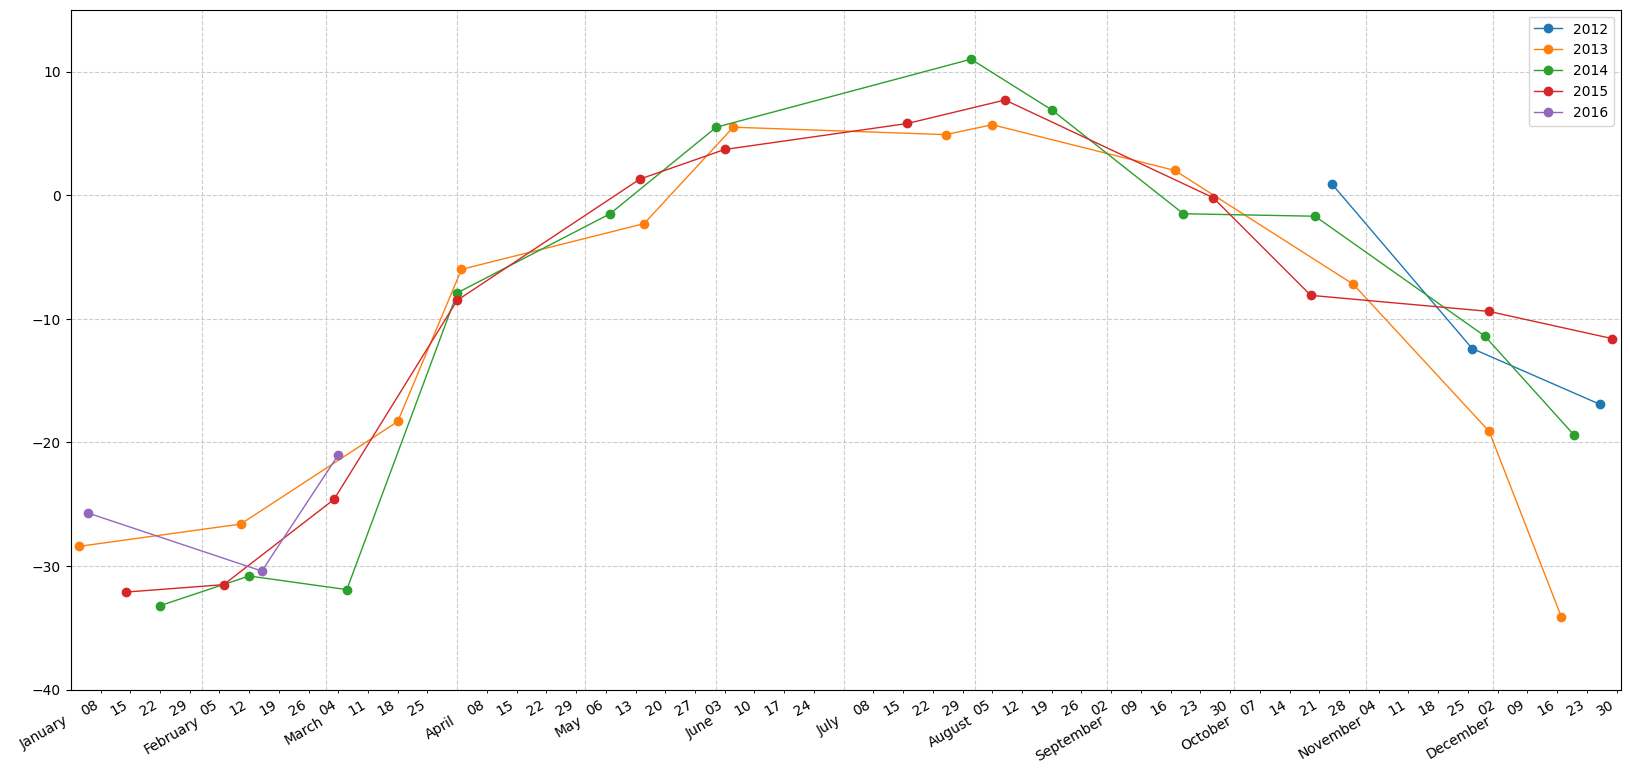

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))

majorfmt = mdates.DateFormatter('\n%B')
minorfmt = mdates.DateFormatter('%d')

ax.set_xlim([datetime.date(2012, 1, 1), datetime.date(2012, 12, 31)])
ax.set_ylim([-40, 15])

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

ax.xaxis.set_major_formatter(majorfmt)
ax.xaxis.set_minor_formatter(minorfmt)

for year in years:

    # Createing a boolean array indicating whether each element is from the year specified year
    boolean_array = year_array == year
    
    #Creating x (dates) and y (temperatures) arrays
    x = date_plot_array[boolean_array]
    y = temp_array[boolean_array]

    ax.plot(x, y, linestyle="-", linewidth=1 , marker="o", label=year)
    ax.legend(loc='best')

ax.grid(which='major', color='#CCCCCC', linestyle='--')

fig.autofmt_xdate(which='both')

Once again, you can see that the lowest temperature was on December 17, 2013.

Also, and in my opinion, you can see the comparison of the coldest days in each month in a clearer way. 